In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
hline = '-' * 30

In [3]:
df_raw = pd.read_csv('data_3x3.csv', sep=';')
print(df_raw.columns.tolist())

['No.', 'Time', 'Comment', 'Scramble', 'Date', 'P.1']


In [4]:
def find_plus2_dnf():
    plus2_cnt = 0
    plus2_str = ''
    dnf_cnt = 0
    dnf_str = ''
    for i in range(len(df_raw)):
        num = df_raw.loc[i, "No."]
        time = df_raw.loc[i, 'Time']
        time_raw = df_raw.loc[i, 'P.1']
        if type(time) != str:
            continue
        if time[-1] == '+':
            plus2_cnt += 1
            plus2_str += f'{num} {time} {time_raw}\n'
        elif time[:3] == 'DNF':
            dnf_cnt += 1
            dnf_str += f'{num} {time} {time_raw}\n'
    plus2_str = plus2_str.rstrip()
    dnf_str = dnf_str.rstrip()
    if plus2_cnt > 0:
        print(plus2_str)
    print(f'{plus2_cnt} +2{"" if plus2_cnt == 1 else "s"} found.')
    print(hline)
    if dnf_cnt > 0:
        print(dnf_str)
    print(f'{dnf_cnt} DNF{"" if dnf_cnt == 1 else "s"} found.')
    print(hline)

In [5]:
find_plus2_dnf()

0 +2s found.
------------------------------
0 DNFs found.
------------------------------


In [6]:
# Process raw data
df = df_raw.drop(columns=['Comment','Time'])
df.rename(columns={'P.1': 'Time', 'Date': 'DateTime'}, inplace=True)
df = df.reindex(columns=['No.', 'Time', 'Scramble', 'DateTime'])
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Date'] = df['DateTime'].dt.date
df['TimeOfDay'] = df['DateTime'].dt.time

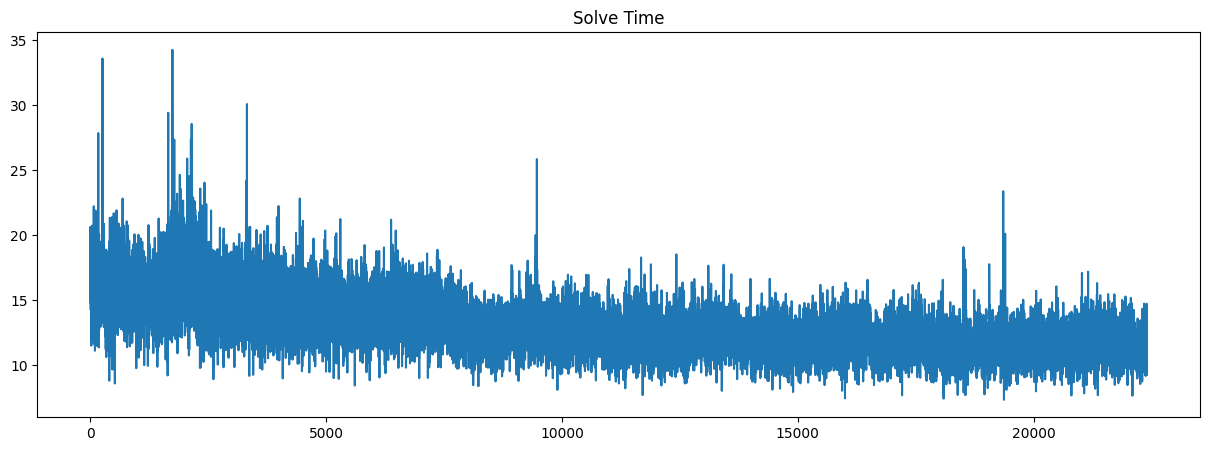

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(df['No.'], df['Time'])
plt.title('Solve Time')
plt.show()

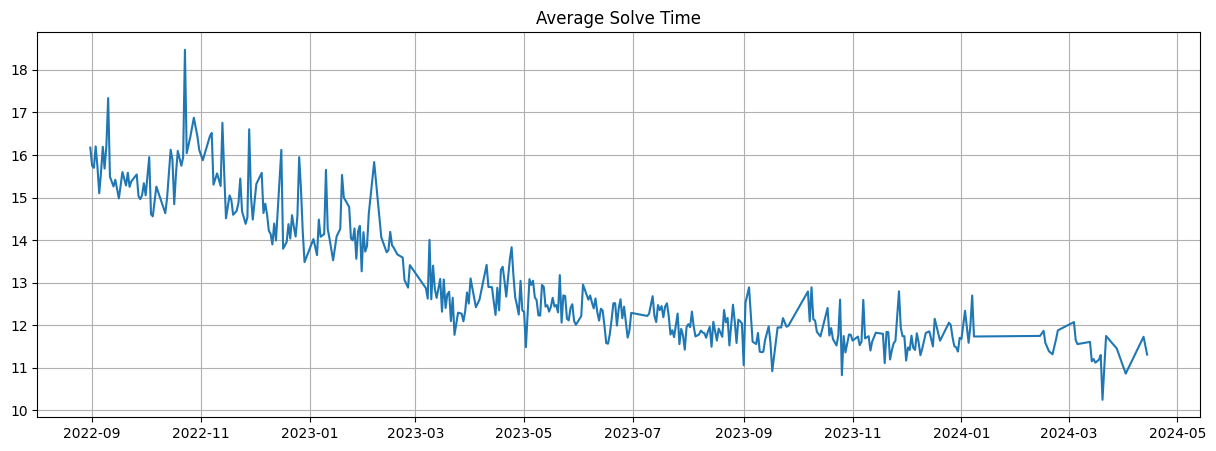

In [8]:
time_vs_day = df.groupby('Date')['Time'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(time_vs_day['Date'], time_vs_day['Time'])
plt.title('Average Solve Time')
plt.yticks(range(10, 19, 1))
plt.grid()
plt.show()

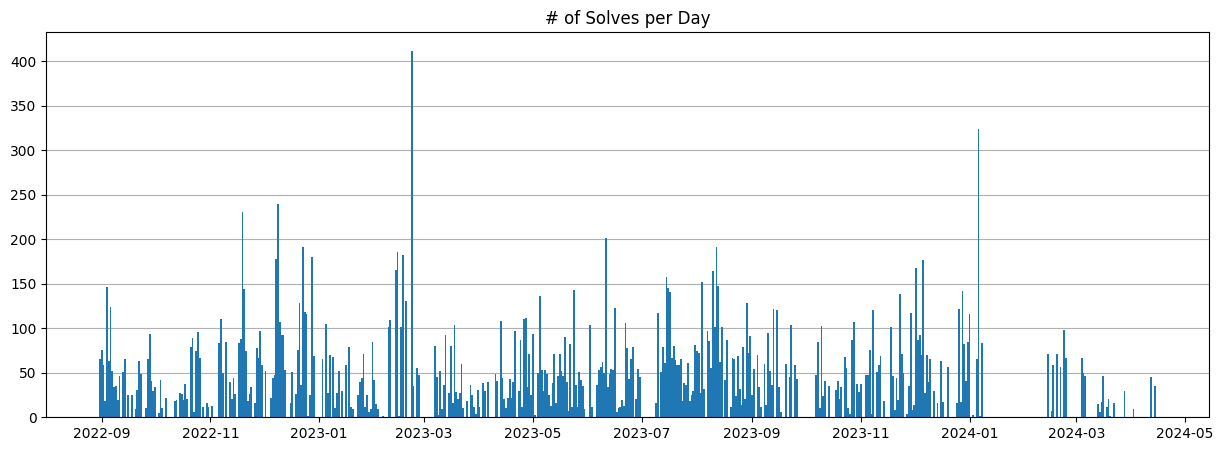

In [12]:
num_vs_day = df.groupby('Date').size().reset_index(name='NumSolves')

plt.figure(figsize=(15, 5))
plt.bar(num_vs_day['Date'], num_vs_day['NumSolves'], width=1)
plt.title('# of Solves per Day')
plt.gca().set_axisbelow(True)
plt.grid(axis='y')
plt.show()

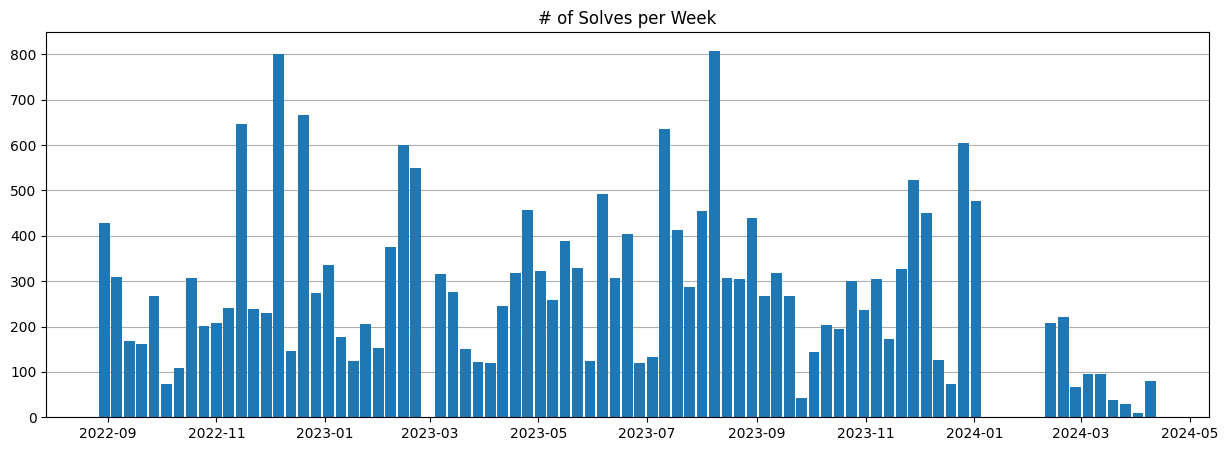

In [13]:
num_vs_week = num_vs_day.copy()
num_vs_week['Date'] = pd.to_datetime(num_vs_week['Date'])
num_vs_week['Week'] = num_vs_week['Date'].dt.to_period('W-MON').apply(lambda period: period.start_time)
num_vs_week = num_vs_week.groupby('Week')['NumSolves'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(num_vs_week['Week'], num_vs_week['NumSolves'], width=6)
plt.title('# of Solves per Week')
plt.gca().set_axisbelow(True)
plt.grid(axis='y')
plt.show()